# Corn Infection Detection: Data Preparation


## Introduction
Here on this blog, i will be giving a gentle introduction about how to do Region Based Detection project on python from scratch. The scratch means from image capturing to the model release. We have seen lots of computer vision progress but most of them are state of the art and only few of them are helping our Agriculture and Farming.

### How am i here?
My first idea of a project was to create a Computer Vision system that can detect the dead hen from the healthy one but data preparation was not done hence it never started. But when on this lockdown, I was at dad's corn field then I saw infections on corn leaves. Not only ours but entire village's corn leaves were infected/eaten by some pest (Nepali name <i>American Fauji Kira</i>). So I decided to do something about it. I took images and then tried to find the portion where possibly the infection might have been. The entire progress file is provided on the [GitHub link](https://github.com/q-viper/Corn-Infection-Detection/blob/master/Progress.md) below about how this project completed and how much time did it take. I am also going to request you to look over the [dataset](https://www.kaggle.com/qramkrishna/corn-leaf-infection-dataset) and then try your own solution.

## Credits
I am living on village and my option of internet is cellular data. From the help of Vikash Krishna, I am using larger data packs these days. I want to give him huge credits. <strike>And also i will transfer these dataset to public domain soon.</strike> These dataset are available.

## Image Acquistion
Images are taken by myself from the ground using my phone Samsung Galaxy J2 and Samsung Galaxy A30, average image dimension is 3000 by 3500. I have collected 2k+ for each infected/non-infected leaves images. Sample images are given below.

### Infected leaves Images
<img src="infected/20200701_080900.jpg" width=50%>
<img src="infected/20200701_084902.jpg" width=50%>

### Normal Images
<img src="healthy corn/20200727_092741.jpg" width=50%>
<img src="healthy corn/20200727_092859.jpg" width=50%>

## Image Annotation
Annotation of Image can be done by many open source softwares and most popular one is Microsoft's Vott and there are also other tools like LabelImg too. Please search about them on google. I am using MS's Vott for my problem. My system is Intel Dell I5 with 8GB of RAM and 250SSD. What is figured out is, the image opening on windows's native image viewer and Vott is different. I am using Vott 2.2.0. Lets take a look. 
<img src="assets/diff imgs.png">

To make our annotation fit with our real image stored on a system, we have to rotate image to 90 degree. Which can be done by numpy's rot90 method.

I am not going to start a tutorial on Annotating images. But i might later write one so keep notified. But below is a simple demo.
<figure>
<video src = "Assets/vott use.mp4" width="100%" controls autoplay loop> </video>
<figcaption style = "text-align:left; font-style:italic">VoTT</figcaption>
</figure>

#### Note
* I am using Export settings as CSV, hence it is recommended to do same.
* I am using only one label i.e. infected. You can change it later too.

## Image Manipulation
As i stated earlier, annotation is incorrect. May be this is the problem with my camera or my Vott version but i highly recommend you to check if annotation and your image is aligned right. You can follow [Check Bounding Box](#Check-Bounding-Box) section. hence we have to rotate our image to 90 degree. It is easy to do this using Numpy's rot90. 

## Image Agumentation
Agumentation of image is tricky because of the Annotation. If we were dealing with classification problem then it would have been lot easier but instead, we are dealing with annotated image and the label is a value of Bounding Box. So while agumenting image, we also have to agument our annotation values too. This problem has taken my days. I will share the codes later.

## Image Feeding
Image now has to be feed onto some model inorder to train it. But first i am going to train a simple Region Network which will classify a given patch into one of infected/non-infected class. Because the architectures like RCNN are based on this same idea whether the current part of image is background or foreground. The problem of Region Proposal on this Corn Infection is hard and i am trying to figure it out soon.

# Implementation
First make our helper functions ready along with some default directory values.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

def show(img, figsize=(10, 10)):
    fig = plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.show()


## Check Bounding Box
* Read image from directory.
* Read annotation file from directory.
* Check matching image name on annotation file.
* Draw rectangle around the image and show it.

In [2]:
csv_file = "F:/Desktop/work/Corn Disease detection/Annotation/vott-csv-export/Annotation-export.csv"
df = pd.read_csv(csv_file)
images_dir = "Infected/" 
df.head()

image         xmin         ymin         xmax         ymax  \
0  20200612_103505.jpg  1088.460432   115.936102  2248.748201   850.198083   
1  20200612_103505.jpg    60.776978  2847.335463   823.251799  3456.000000   
2  20200612_103505.jpg   618.820144  1699.015974   618.820144  1699.015974   
3  20200612_103536.jpg  1077.410072     9.661342  2154.820144   694.236422   
4  20200612_103536.jpg   663.021583  2229.009585  1000.057554  2532.651757   

      label  
0  infected  
1  infected  
2  infected  
3  infected  
4  infected

20200612_103505.jpg


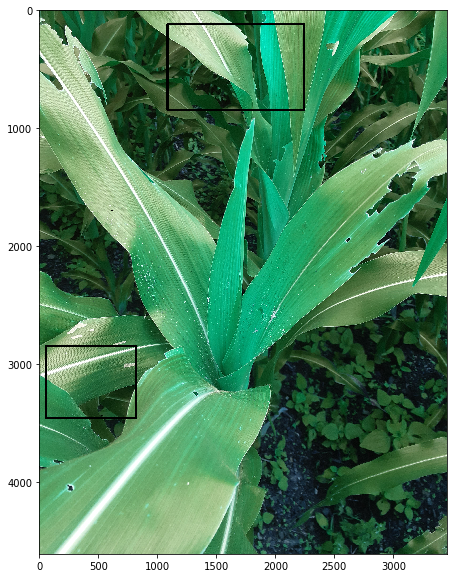

20200612_103531.jpg


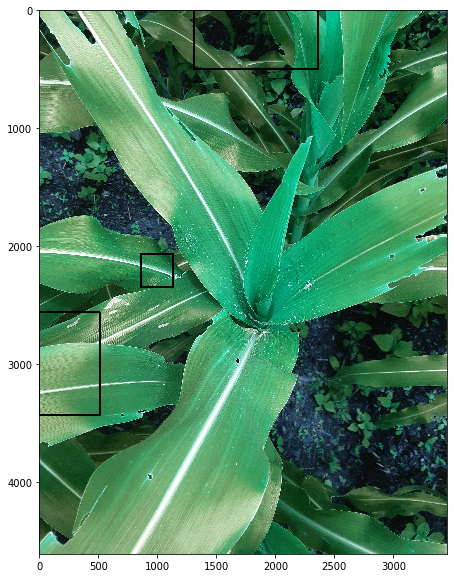

20200612_103536.jpg


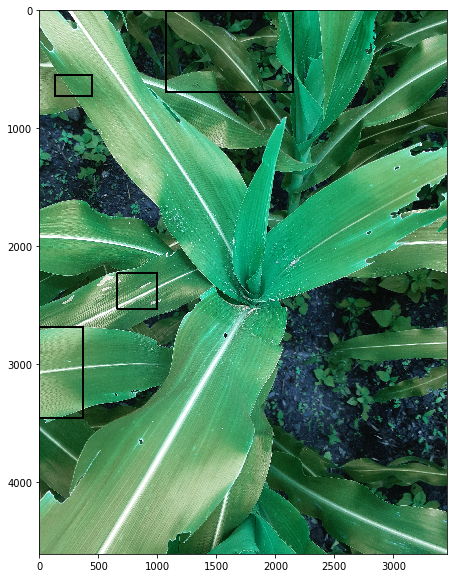

In [3]:
# lets check only 2 images and its annotations
n = 2
c = 0
for img in os.listdir(images_dir):
    if img.split(".")[-1] in ["jpg", "jpeg", "png"]:
        lbls = df[df.image == img]
        im = cv2.imread(images_dir+img)
        isize = im.shape
        for _,row in lbls.iterrows():
            r = np.array([row.xmin, row.ymin, row.xmax, row.ymax])
            r = r.astype(np.int)
            cv2.rectangle(im, (r[0], r[1]), (r[2], r[3]), (0, 0, 0), 15)
        print(img)
        show(im)
        if c == n:
            break
        c += 1

Which is clear that our annotation is not doing good so if we rotated them to 90 degree and apply the annotation, it will work. Only problem i had was i was not able to draw rectangle on it and show at the same time. But writing image and re-reading worked.

20200612_103505.jpg


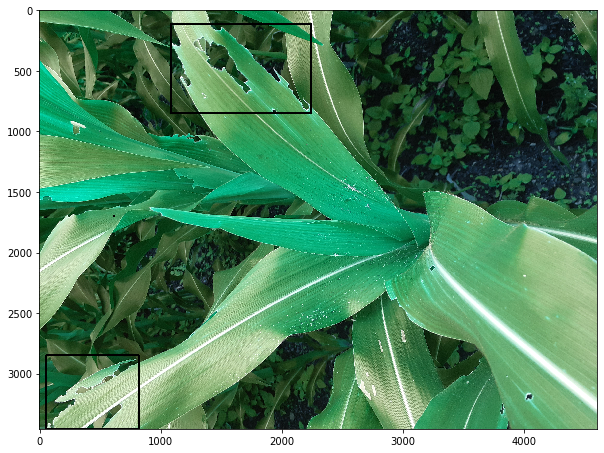

20200612_103531.jpg


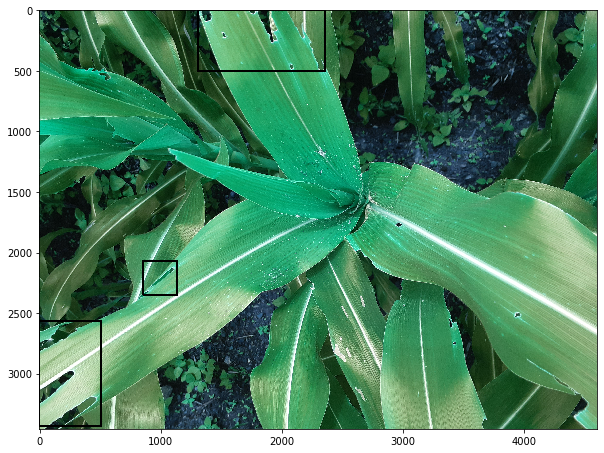

20200612_103536.jpg


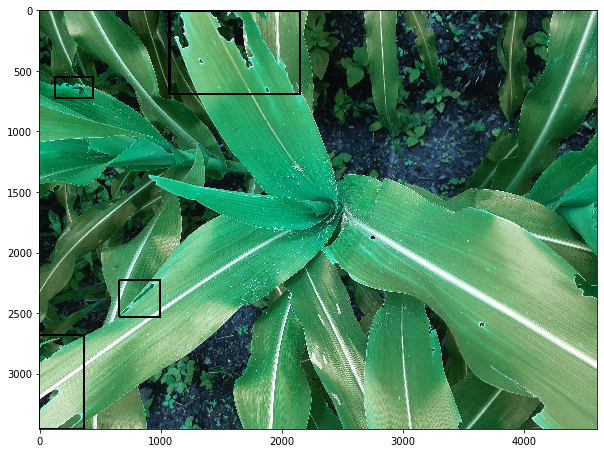

In [4]:
# lets check only 2 images and its annotations
n = 2
c = 0
for img in os.listdir(images_dir):
    if img.split(".")[-1] in ["jpg", "jpeg", "png"]:
        lbls = df[df.image == img]
        im = cv2.imread(images_dir+img)
        im = np.rot90(im)
        cv2.imwrite("dummy.png", im)
        im = cv2.imread("dummy.png")
        
        isize = im.shape
        for _,row in lbls.iterrows():
            r = np.array([row.xmin, row.ymin, row.xmax, row.ymax])
            r = r.astype(np.int)
            cv2.rectangle(im, (r[0], r[1]), (r[2], r[3]), (0, 0, 0), 15)
        print(img)
        show(im)
        if c == n:
            break
        c += 1

Now the annnotations are working as we expected it to work.

<strong>It became clear that for me, image had to be rotated 90 degree before feeding it to anywhere.</strong>

## Agumentation Of Image
Since i had very few images, i thought of making 10 images out of 1 image. Agumentation of data always helps to solve our problem of having less data. Techniques of Agumentation are given below:-
* Flip x
* Flip y
* Flip xy
* Brightness
* Erosion
* Dilation followed by Erosion
* Dilation
* Erosion followed by Dilation
* Scale 0.75
* Scale 0.5

### Code in Action

-------------------------------------------------------------------------------------------
	Current kind: flipxy
	Current Root: Annotation/vott-csv-export/
	Current Annotation File: Annotation-export.csv    
	Saving Dir: Agumented/
	Agumentated File: agumented.csv
--------------------------------------------------------------------------------------------

Current Image: 20200612_103505.jpg
20200612_103505.jpg
Image Saved as: Agumented/flipxy_20200612_103505.jpg


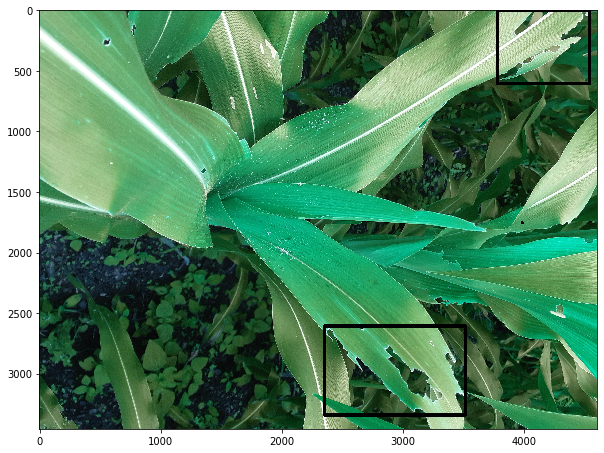

Written new annotations.
Image agumented.

------------------------------------------------------

Current Image: 20200612_103531.jpg
20200612_103531.jpg


KeyboardInterrupt: 

In [5]:
def flipped(rimg, r, kind='x'):
    """
    Returns coordinate values of rotated points on an image.
    """
    rr = r
    f = 0
    if kind == 'x':
        f = 0
    elif kind == "y":
        f = 1
    elif kind == "xy":
        f = -1
    timg = rimg.copy()
    timg = np.zeros(timg.shape) + 255
    shape = rimg.shape
    #print(shape)
    r[1] = np.clip(r[1], 0, shape[0]-1)
    r[3] = np.clip(r[3], 0, shape[0]-1)
    r[0] = np.clip(r[0], 0, shape[1]-1)
    r[2] = np.clip(r[2], 0, shape[1]-1)
    
    timg[r[1], r[0]] = 0
    timg[r[3], r[2]] = 0
    timg = cv2.flip(timg, f)
    res = np.where(timg == [0, 0, 0])

    r1, r3 = res[0][0], res[0][-1]
    r0, r2 = res[1][0], res[1][-1]
    rr = [r0, r1, r2, r3]

    timg = cv2.flip(rimg.copy(), f)
    timg[r1:r3, r2:r0] = 0
    return rr

def brightness(himg, value = 30):
    if value < 0:
        value = -np.uint8(value)
    hsv = cv2.cvtColor(himg, cv2.COLOR_BGR2HSV)
    #show(hsv)
    h,s,v = cv2.split(hsv)
    
    lim = 255-value
    v[v>lim]=255
    v[v<=lim] += value
    hsv = cv2.merge((h, s, v))
    im = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    #show(himg)
    #show(cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR))
    return im

def agument_image(root="Annotation/vott-csv-export/", 
                  annotation_file="Annotation-export.csv", 
                  save_dir = "Agumented/", file_name="agumented.csv", 
                   kind = "flipy", show_image=False, 
                  save_image=True):
    """
        root: Annotation root dir.
        annotation_file: annotation file name.
        save_dir: saving dir for newly made image/file
        file_name: new agumented file
        kind: agument type, one of ["flipxy", "flipx", "flipy", "dfe", "efd", "d", "e", "brightup", "s05", "s075"]
        show_image: whether to show new image
        save_image: whether to save new image
        ------------------------
        Kinds are, 
            1. flipxy 2. flipx 3. flipy 4. dilation of erosion 5. erosion of dilation 6. dilation 7. erosion 8. brightness increased
            10. scale 0.5 9. scale 0.75
    """
    
    root = root
    images = os.listdir(root)
    df = pd.read_csv(root+annotation_file)
    ndf = pd.DataFrame(data=None, columns=df.columns)
    if os.path.isfile(save_dir+file_name):
        agdf = pd.read_csv(save_dir+file_name)
        k = len(agdf)
    else:
        k = 0
        with open(save_dir+file_name, "w") as nd:
            nd.writelines(ndf.to_csv().replace("\r\n", ""))
    curr_kind = kind
    kinds = ["flipxy", "flipx", "flipy", "dfe", "efd", "d", "e", "brightup", "s05", "s075"]
    
    print("-------------------------------------------------------------------------------------------")
    print(f"\tCurrent kind: {kind}\n\tCurrent Root: {root}\n\tCurrent Annotation File: {annotation_file}\
    \n\tSaving Dir: {save_dir}\n\tAgumentated File: {file_name}")
    print("--------------------------------------------------------------------------------------------\n")
    
    for img_name in images: 
        print(f"Current Image: {img_name}")
        ndf = pd.DataFrame(data=None, columns=df.columns)
        i=0
        if img_name.split(".")[-1] in ["jpg", "jpeg", "png"]:
            print(img_name)
            img = cv2.imread(root+img_name)
            #show(img)
            img = np.rot90(img)
            cv2.imwrite("r90.jpg", img)
            img = cv2.imread("r90.jpg")
            #print(img.shape)
            lbls = df[df.image == img_name]
            if len(lbls) > 0:
                rect_toshow = []
                rect = []
                # find flip x coordinate and save image coordinates as df
                if curr_kind == "flipx":                
                    img = cv2.flip(img, 0)
                    for _,row in lbls.iterrows():
                        bb = [row.xmin, row.ymin, row.xmax, row.ymax]
                        bb = np.array(bb).astype(np.int)
                        nbb = flipped(img, bb, 'x')
                        r = nbb.copy()
                        nbb.insert(0, curr_kind +"_"+img_name)
                        nbb.append(row.label)
                        rect.append(nbb)
                        #print(bb, nbb)
                        ndf.loc[i] = nbb
                        i += 1
                        rect = []
                        rect_toshow.append(r)
                # flip y 
                elif curr_kind == "flipy":
                    img = cv2.flip(img, 1)
                    for _,row in lbls.iterrows():
                        bb = [row.xmin, row.ymin, row.xmax, row.ymax]
                        bb = np.array(bb).astype(np.int)
                        nbb = flipped(img, bb, 'y')
                        r = nbb.copy()
                        nbb.insert(0, curr_kind +"_"+img_name)
                        nbb.append(row.label)
                        rect.append(nbb)
                        #print(bb, nbb)
                        ndf.loc[i] = nbb
                        i += 1
                        rect = []
                        rect_toshow.append(r)
                elif curr_kind == "flipxy":
                    img = cv2.flip(img, -1)
                    for _,row in lbls.iterrows():
                        bb = [row.xmin, row.ymin, row.xmax, row.ymax]
                        bb = np.array(bb).astype(np.int)
                        nbb = flipped(img, bb, 'xy')
                        r = nbb.copy()
                        nbb.insert(0, curr_kind +"_"+img_name)
                        nbb.append(row.label)
                        rect.append(nbb)
                        ndf.loc[i] = nbb
                        i += 1
                        rect = []
                        rect_toshow.append(r)
                elif curr_kind in kinds[3:8]:
                    # brightness
                    if curr_kind == "brightup":
                        img = brightness(img)
                
                    # dilate
                    if curr_kind in ["d", "efd"]:
                        img = cv2.dilate(img, (3, 3), iterations=10)
                        if curr_kind == "efd":
                            # efd
                            img = cv2.erode(img, (3, 3), iterations=10)
                    
                    # erode
                    if curr_kind in ["e", "dfe"]:
                        img = cv2.erode(img, (3, 3), iterations=10)
                        if curr_kind == "dfe":
                            #dfe
                            img = cv2.dilate(img, (3, 3), iterations=10)
                        
                    for _,row in lbls.iterrows():
                        nbb = [row.xmin, row.ymin, row.xmax, row.ymax]
                        r = np.array(nbb).astype(np.int)
                        nbb = r.tolist()
                        nbb.insert(0, curr_kind +"_"+img_name)
                        nbb.append(row.label)
                        rect.append(nbb)
                        #print(bb, nbb)
                        ndf.loc[i] = nbb
                        i += 1
                        rect_toshow.append(r)
                    
                elif curr_kind == "s05":
                    d = 0.5
                    rect = []
                    img = cv2.resize(img, None, fx=d, fy=d)
                    for _,row in lbls.iterrows():
                        rect.append([row.xmin, row.ymin, row.xmax, row.ymax])
                        r = [row.xmin, row.ymin, row.xmax, row.ymax]
                        r = np.array(r)
                        r = r * d
                        r = r.astype(np.int)
                        temp = r.tolist()
                        temp.insert(0, curr_kind +"_"+img_name)
                        temp.append(row.label)
                        ndf.loc[i] = temp
                        i+=1
                        rect_toshow.append(r)
                    
                elif curr_kind == "s075":
                    d = 0.75
                    rect = []
                    img = cv2.resize(img, None, fx=d, fy=d)
                    for _,row in lbls.iterrows():
                        rect.append([row.xmin, row.ymin, row.xmax, row.ymax])
                        r = [row.xmin, row.ymin, row.xmax, row.ymax]
                        r = np.array(r)
                        r = r * d
                        r = r.astype(np.int)
                        temp = r.tolist()
                        temp.insert(0, curr_kind +"_"+img_name)
                        temp.append(row.label)
                        ndf.loc[i] = temp
                        i+=1
                        
                        rect_toshow.append(r)
                sname = save_dir+curr_kind +"_"+img_name
                if save_image:
                    cv2.imwrite(sname, img)
                    print(f"Image Saved as: {sname}")
                    
                if show_image:
                    for r in rect_toshow:
                        cv2.rectangle(img, (r[0], r[1]), (r[2], r[3]), (0, 0, 0), 25)
                    show(img)
                with open(save_dir+file_name, "a") as fn:
                    c = ndf.to_csv()
                    v = c[len(c.split("\r\n")[0]):]
                    #print(v.replace("\r", "")[:-1])
                    nst = "\n"
                    for st in v.replace("\r", "")[:-1].split("\n")[1:]:
                        #print(st.split(","))
                        ind = len(st.split(",")[0])
                        st = str(k) + st[ind:] 
                        k += 1
                        nst += st+"\n"
                    #print(nst[:-1])
                    fn.writelines(nst[:-1])
                    print(f"Written new annotations.")
                print("Image agumented.\n")
                print("------------------------------------------------------\n")
                
    
    # newly made csv file has additional 1 column, which should be dropped here
    ddf = pd.read_csv(save_dir+file_name)
    ddf = ddf.drop(["Unnamed: 0"], axis=1)
    ddf.to_csv(save_dir+file_name, index=False)
agument_image(kind="flipxy", show_image=True)

Please follow the docstring and comments of the code for more clarification. I have defined 3 methods above. And main method is the `agument_image`.

#### Method:`agument_image`
This method takes a original image directory, original annotation file, new directory to save image, new file name for new annotations and some other normal parameters. Among them `save_image`, is used to save image on the given directory and `show_image` is whether to show new agumented image or not. I have worked days to make this method work.
* Read 

## Image DataGenerator
Datagenerators are python functions with `yield` instead of return. Keras's `ImageDataGenerator` comes pretty handy at these situation. But for the Region Based Models, we need to train a binary classifier whether the proposed region is foreground or background. And in our case, it can be either infected or not infected part. So what can we do is read images from both healthy and infected directories. Then for every infected image, there are bounding box associated with it. We will take the patch of infected leaf using those boxes. For healthy image, we will crop the image with same bounding box. And then we can pass these patches to further fitting steps.

In [13]:
from tensorflow.python.keras.utils import Sequence
class RegionDataGenerator(Sequence):
    """
        Inherits the Keras Sequence to generate batch data from images.
        Blackbox works:
            1. Takes healthy corn images, infected corn images, annotation file directory.
            2. For each image index on batch, performs below:-
                (Done some image operations like flipping to make sure image is positioned right.)
                a. Read image(healthy and infected) for infected image, finds bounding boxes.
                b. Append each bounding box's infected image patch to list and take same bounding box's patch from healthy
                    and also do categorical labeling.([1, 0] for infected, [0, 1] for healthy.)
    """
    
    def __init__(self, ndir="Healthy corn/", idir="Infected/", 
                 adf="Annotation/vott-csv-export/Annotation-export.csv", 
                 target_size=(128,128), batch_size=16):
        """ 
           Blackbox works:
                1. Takes healthy corn images, infected corn images, annotation file directory.
                2. For each image index on batch, performs below:-
                    (Done some image operations like flipping to make sure image is positioned right.)
                    a. Read image(healthy and infected) for infected image, finds bounding boxes.
                    b. Append each bounding box's infected image patch to list and take same bounding box's patch from healthy
                        and also do categorical labeling.([1, 0] for infected, [0, 1] for healthy.)
                3. The batch size here is not real batch size but this batch size is used to get images of this size.
                4. Each image is assumed to have atleast 2 patches.
                5. Single batch contains more than: batch_size * 2 * 2 examples.
        """
    
        ndirs = ["Healthy corn/"+d for d in os.listdir(ndir)]
        idirs = ["Infected/"+d for d in os.listdir(idir)][:len(ndirs)]
        adf = pd.read_csv(adf)

        self.x = np.arange(len(ndirs))
        self.batch_size = batch_size
        self.adf = adf
        self.idirs = idirs
        self.ndirs = ndirs
        self.target_size = target_size
        print(f"Total {len(ndirs) * 2} examples.")
        
    def __len__(self):
        return int(np.ceil(len(self.x)/float(self.batch_size)))
    
    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx+1) * self.batch_size]
        #batch_y = self.y[idx * self.batch_size:(idx+1) * self.batch_size]
        
        x, y = self.generate_patches(batch_x)
        #print(batch.shape)
        return x, y
    
    def generate_patches(self, ids):
        
        """
            ids:- id or index of image names taken from directory.
            returns x, y from batch of indices but batch size will be greater than len(ids)
        """
        
        examples= []
        lbls = []
        for i in ids:
            fnimg = ndirs[i]
            iimg = idirs[i]
            annotation = adf[adf.image == iimg.split("/")[1]]
            #print(annotation)
            if len(annotation) > 0:
                img = cv2.imread(iimg)
                img = np.rot90(img)
                nimg = cv2.imread(fnimg)
                simg = img.shape
                nimg = cv2.resize(nimg, (simg[0], simg[1]))
                nimg = np.rot90(nimg)


                for _,row in annotation.iterrows():
                    r = [row.xmin, row.ymin, row.xmax, row.ymax]
                    r = np.array(r).astype("int")
                    try:
                        if r[1] < r[3] or r[0] < r[2]: 
                            ipatch = cv2.resize(img[r[1]:r[3], r[0]: r[2]], target_size)/255
                            npatch = cv2.resize(nimg[r[1]:r[3], r[0]: r[2]], target_size)/255
                            #yield (np.array([[x/n]]), np.array([2*x/n]))
                            examples.append(np.array(ipatch))
                            lbls.append(np.array([1, 0]))
                            examples.append(np.array(npatch))
                            lbls.append(np.array([0, 1]))
                            
                            #cv2.rectangle(img, (r[0], r[1]), (r[2], r[3]), (0, 0, 0), 25)
                            #show(img)
                            #plt.imshow(img[r[1]:r[3], r[0]: r[2]])
                            #plt.show()
                    except:
                        pass
        examples = np.array(examples)
        lbls = np.array(lbls)
        #print(examples.shape, lbls.shape)
        return examples, lbls

generator = RegionDataGenerator(target_size=(128, 128), batch_size=8)
for i in range(1):
    generator.__getitem__(i)

Total 4000 examples.


In above RegionDataGenerator, I have not used images that were agumented. Because agumentation takes time and i am running low on my storage. What we can do is agument image on the time of generating patch image.

## Fit a Classifier

In [16]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Input
from tensorflow.keras.models import Sequential, Model
target_size = (128, 128)
ip = Input(shape=(target_size[0], target_size[1], 3))

c1 = Conv2D(4, (5, 5), activation="relu")(ip)
c2 = Conv2D(8, (5, 5), activation="relu")(c1)

m1 = MaxPooling2D((5, 5))(c2)

c1 = Conv2D(8, (5, 5), activation="relu")(m1)
c2 = Conv2D(16, (5, 5), activation="relu")(c1)

m2 = MaxPooling2D((5, 5))(c2)

x = Flatten()(m2)
y = Dense(2, activation="softmax")(x)
model = Model(ip, y)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 124, 124, 4)       304       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 120, 120, 8)       808       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 8)         1608      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 16)        3216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)          0   

In [17]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['acc'])
# train the model, numexmp >= step_per_epoch * epochs
history = model.fit_generator(generator, steps_per_epoch=800,
                           epochs=10,
                           verbose = 1)
                             

Epoch 1/10
121/800 [===>..........................] - ETA: 1:22:56 - loss: 0.6342 - acc: 0.6251

KeyboardInterrupt: 

I am skipping the training part because my hardware is pretty slow. But last time I waited for 22 hours to complete this training because I had no internet access and dataset was only available on my system. But now I have published to on Kaggle, it will be easier to work on it. 

Thank you so much for reading this blog and I will really appreciate if you can contribute to solving [this dataset](https://www.kaggle.com/qramkrishna/corn-leaf-infection-dataset).